In [1]:
#!pip install scikit-learn==1.5.1
# uncomment to install  scikit-learn.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from tensor_module import Tensor, Device

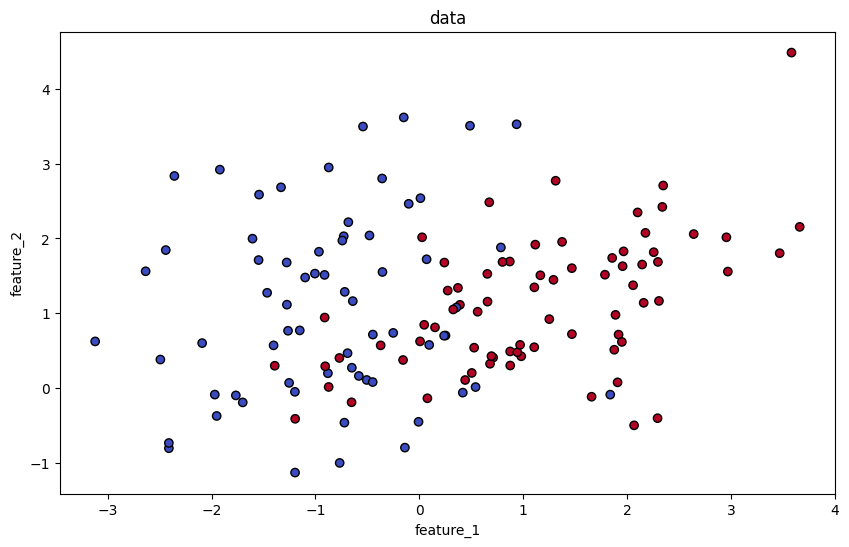

In [3]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("data")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

In [4]:
n_sample, n_feature = X_train.shape
n_class = 2
print(n_sample, n_feature)

print(y_train.shape)

140 2
(140,)


In [10]:
n_class = 1
Xt = Tensor.from_numpy(X_train)
Yt = Tensor.from_numpy(y_train.reshape((n_sample, n_class)))

wt = Tensor.from_numpy( np.zeros((n_feature, n_class)) )
bt = Tensor.from_numpy( np.zeros((1, n_class)) )

In [12]:
iter, max_iter = 0, 1500
loss_tol = 1e-2
lr = 1e-2
ones = Tensor.ones((1, n_sample), Device.CPU)
one_vec = Tensor.ones((n_sample, 1), Device.CPU)

for iter in range(max_iter):
    # wx + b
    y = Tensor.dot(Xt, wt) + bt # (n_sample, n_class)
    
    # softmax
    p = Tensor.exp(-y)
    p = one_vec / (p + one_vec)

    # FIXME: compute the cross-entropy loss

    # backward
    l = p + (-Yt)
    dw = Tensor.dot(Tensor.transpose(Xt), l)
    dw *= (lr / len(Xt))
    assert dw.shape == wt.shape
    wt -= dw

    db = Tensor.dot(ones, l)
    db *= (lr / len(Xt))
    bt -= db

In [13]:
w1, w2 = tuple(wt.to_list())
b = bt.to_list()[0]
print(w1, w2, b)

[1.6050950288772583] [-0.29020699858665466] [0.17369163036346436]


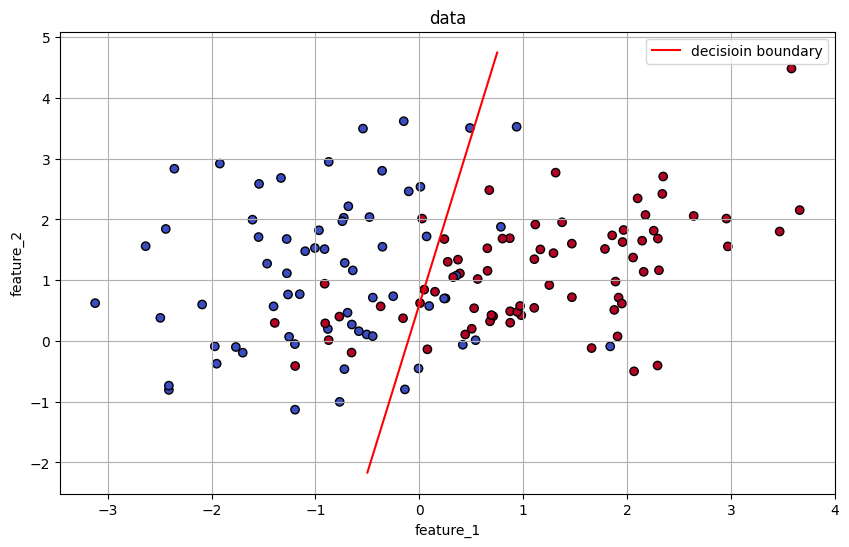

In [14]:
x = np.linspace(-0.5, 0.75, 100)
y = - (w1 * x + b) / w2

plt.close()

plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("data")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.plot(x, y, color='red', label='decisioin boundary')
plt.legend()
plt.grid()

plt.show()

Compute test accuracy.

In [15]:
w = np.array([w1[0], w2[0]])
b = b[0]

y_pred  = (X_test @ w + b)
y_pred = y_pred > 0.0
acc = (np.mean(y_pred == y_test))
print(round(acc, 4))

0.8667


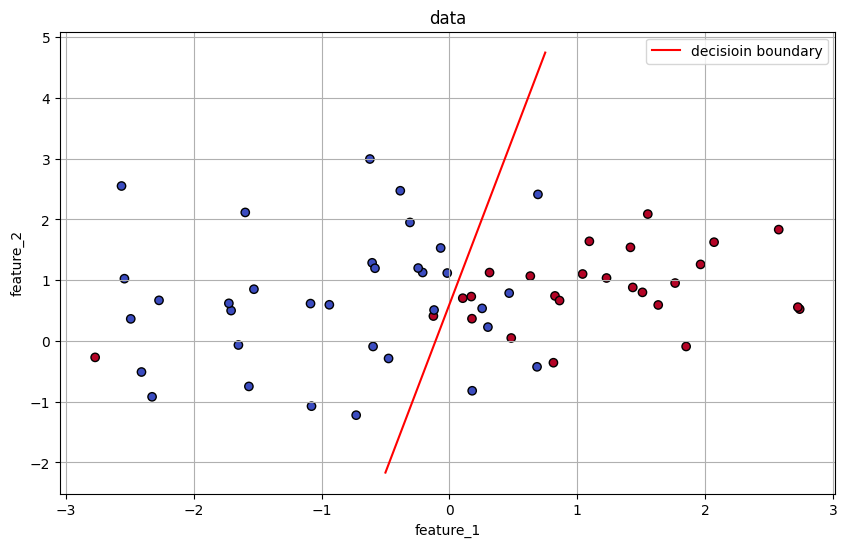

In [16]:
plt.close()

plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("data")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.plot(x, y, color='red', label='decisioin boundary')
plt.legend()
plt.grid()

plt.show()